# 1. Downloading the Data

The data can be downloaded straight from the DigitalFleet Django Admin Panel:
- Visit https://digitalfleet.eu/admin/
- Login with username and password
- Go to EVRecommend > EV Plans
  
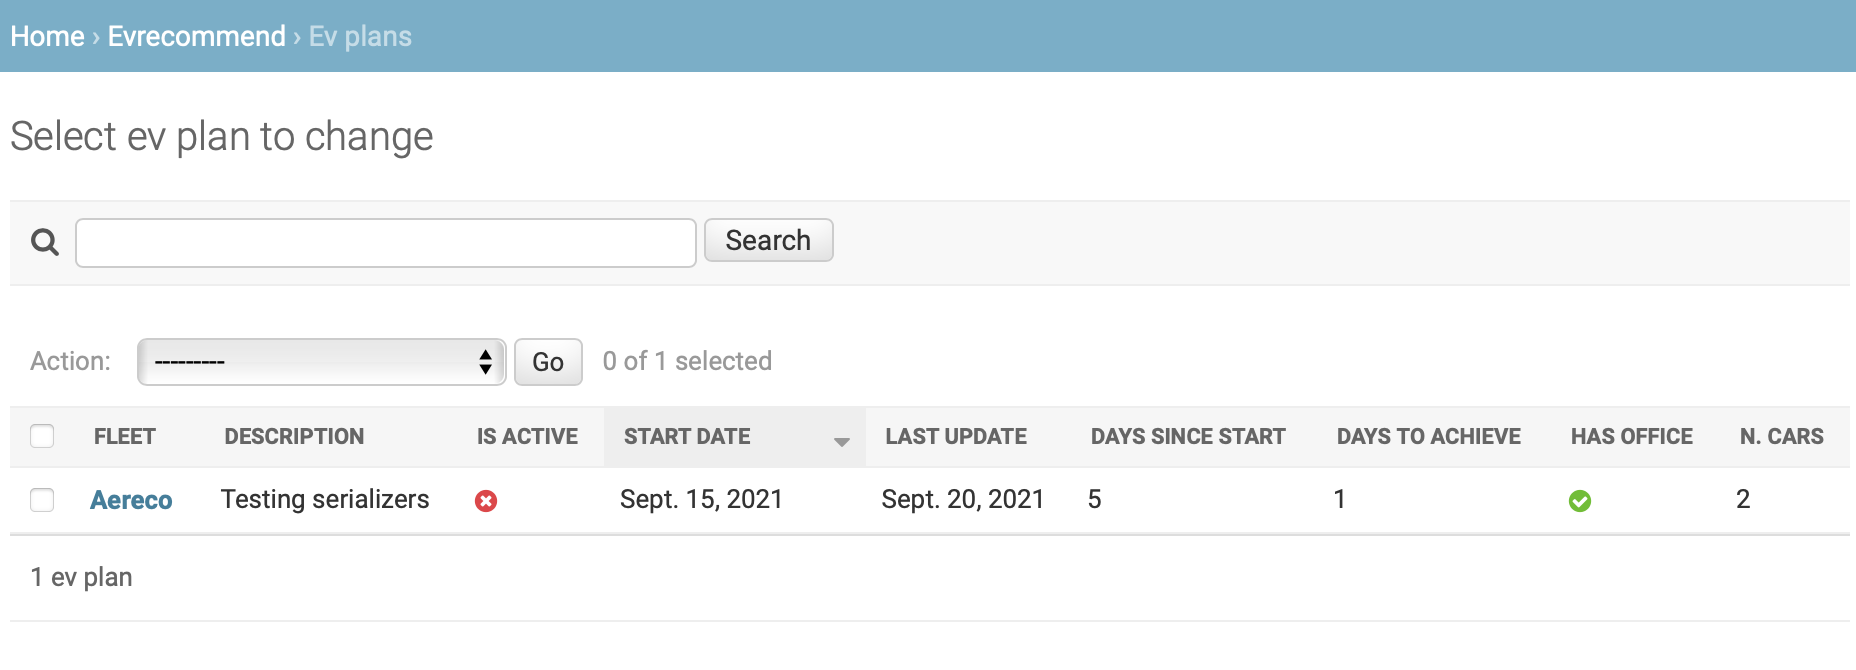

- Select the EV Plans you want to download by checking the boxes on the left (you can even select multiple plans at once).
- From the action dropdown menu choose *Export selected EV plans*.
- Select *JSON* format and click on *Go*.

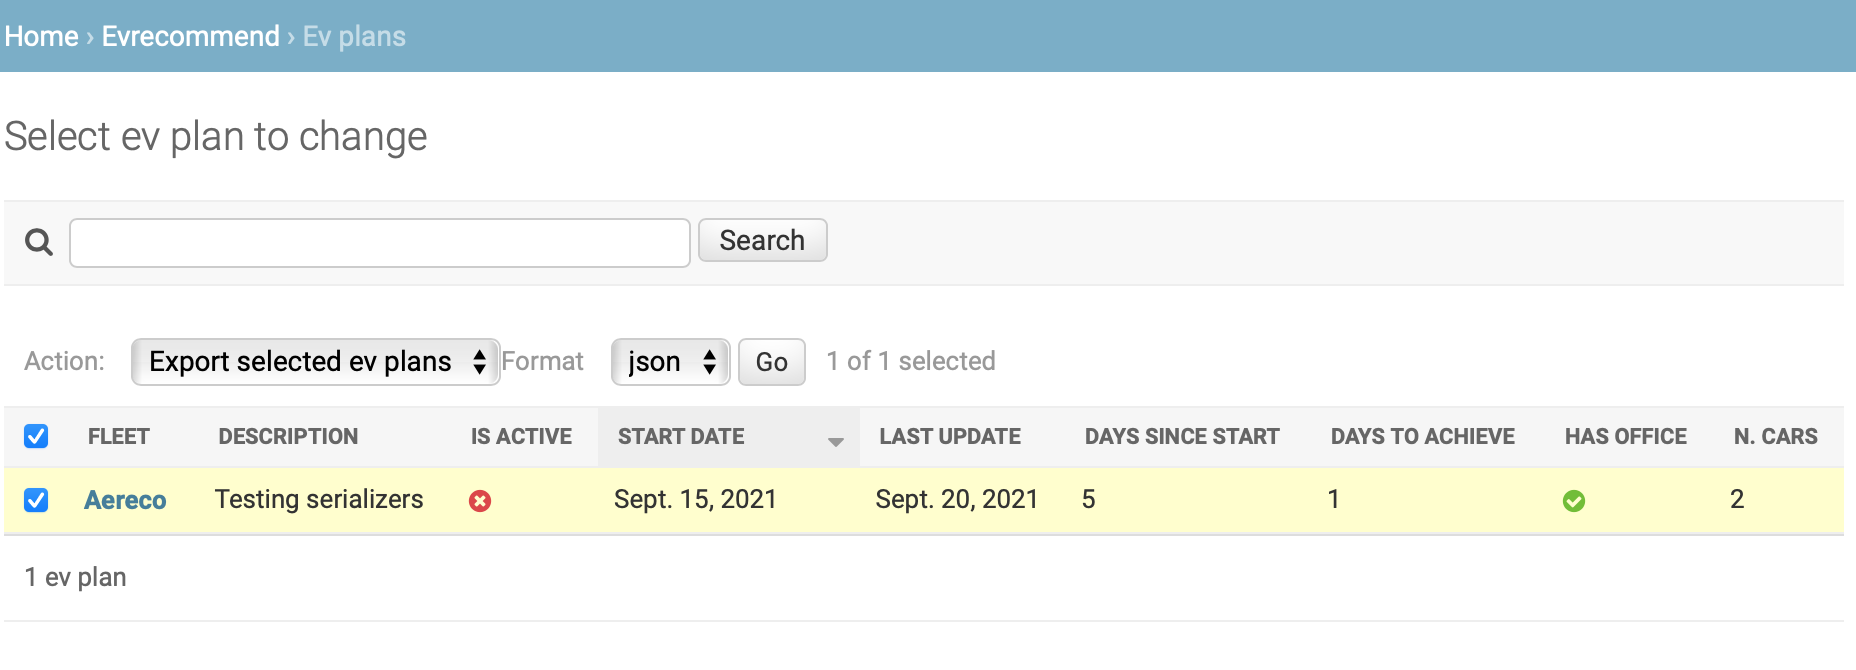

Be aware that the download may take some time, depending on the amount of data (number of analyzed cars, trips and monitoring duration).

# 2. Data Structure

The downloaded json file contains many nested levels of information.

- **EV Plan**
    - **id**: int
    
    - **fleet**: int, id of the fleet
    
    - **start_date**: str, EV Plan monitoring start in yyyy-mm-dd format
    
    - **end_date**: str, EV Plan monitoring end in yyyy-mm-dd format (optional)
    - **last_update_date**: str, EV Plan last update in yyyy-mm-dd format
    - **n_monitored_cars**: int, number of monitored cars within the chosen time frame
    - **all_profiles_up_to_date**: bool, True if all profiles have been updated
    - **monitoring_days_goal**: int, number of ideal days of monitoring
    - **is_active**: bool, True if the EV Plan is still getting updated
    - **office_locations**: list of dictionaries
        - latitude: float
        - longitude: float
    - **home_charger_type**: str, hypothetical home charger (1F, 3F or fast)
    - **office_charger_type**: str, hypothetical office charger (1F, 3F or fast)
    - **charger_radius**: float, max distance in Km between chargers and stop locations
    - **home_radius**: float, float max distance in Km between home locations and stop locations
    - **office_radius**: float, float max distance in Km between office locations and stop locations
    - **description**: str, EV Plan additional description (optional)
    - **aggregated_stats**: dict. **Cumulative stats for all analyzed cars within the Plan**
        - distance_per_speed_limit: dict, Km travelled within each speed limit class
        - speed_limit_distribution: dict, proportion of Km travelled within each speed limit class
        - distance_per_temp_class: dict, Km travelled within each temperature class
        - temp_class_distribution: dict, proportion of Km travelled within each temperature class
        - range_drop_speed: float, average % drop in EV Range due to visited roads
        - range_drop_temp: float, average % drop in EV Range due to external temperature
        - tot_distance: float, total Km travelled
        - tot_overspeeding_distance: float, total Km where recorded speed was > speed limit
        - overspeeding_ratio: float, overspeeding distance / total distance
        - overspeeding_distance_per_speed_limit: dict, overspeeding Km within each speed limit class
        - overspeeding_distribution: dict, proportion of distance travelled while overspeedin within each speed limit class
        - overspeeding_ratio_per_speed_limit: dict, distance travelled while overspeeding within each speed limit class / total Km within each speed limit class
        - tot_over_90_distance: float, total Km where recorded speed was > 90 Km/h
        - over_90_ratio: float, over 90 distance / total distance
        - over_90_distance_per_speed_limit: dict, distance travelled > 90 Km/h within that speed limit class
        - over_90_distribution: dict, proportion of distance travelled > 90 Km/h within each speed limit class
        - over_90_ratio_per_speed_limit: dict, distance travelled > 90 Km/h within each speed limit class / total Km within that speed limit class
        - tot_segments: int, total visited unique road segments
        - segments_with_limits: int, number of road segments with available speed limit data
        - speed_limits_availability: float, segments with limits / tot segments
        - active_days_score: float, min(1, average active days per profile / monitoring days goal)
        - states_availability: float, number of trips with available states / total trips
        - recorded_distance_ratio: float, 1 - total unrecorded distance / (total unrecorded distance + total estimated distance)
        - daily_distributions: dict
            - distance
                - distribution: list, total distance travelled per unique day
                - coef_var: float, daily distance coefficient of variation
            - n_trips
                - distribution: list, total number of trips per unique day
                - coef_var: float, daily number of trips coefficient of variation
            - avg_stop_time
                - distribution: list, average stop time per unique day
                - coef_var: float, daily average stop time coefficient of variation
            - speed_limits
                - distribution: list, % of distance travelled within each speed limit class per unique day
                - coef_var: float, daily speed limits distribution coefficient of variation
                
                
  - **profiles**: list, data specific to each analyzed car within the EV Plan
  
      - id: int
      - car: dict
          - id: int
          - license_plate: str
          - brand: str
          - model: str
          - production_year: int
          - data_source: str
      - drivers: list
          - id: int
          - name: str, driver full name
          - home_locations: list
              - latitude
              - longitude
          - n_trips: int, number of analyzed trips for the specific driver
          - behavior_score: float, behavior score for the specific driver
      - last_update: str, last time the profile was updated in yyyy-mm-ddThh:mm:ss:Z format
      - data_quality_score: float, between 0 and 10
      - reliability_score: float, between 0 and 10
      - car_use_score: float, between 0 and 10
      - driver_behavior_score: float, between 0 and 10
      - monitoring_completed: bool, True if either the EV Plan end date or ideal number of monitoring days have been reached.
      - n_trips: int, total analyzed trips for the given car.
      - active_days: int, number of unique days when at least 1 trip was recorded within the monitoring time frame.
      - monitoring_days: int, total number of monitoring days.
      - fuel_costs: int, expected yearly fuel costs for the given car (in pln).
      - trips: list, data about each of the analyzed trips for the given car.
          - id: int, trip id
          - driver: int, driver id
          - distance: float, km
          - start_location: dict
              - latitude: float
              - longitude: float
          - start_time: str, trip start time in yyyy-mm-ddThh:mm:ss:Z format
          - end_time: str, trip end time in yyyy-mm-ddThh:mm:ss:Z format
          - pause_duration: int, stop time in seconds between the trip start and the previous trip end
          - fastest_charger_nearby: str, fastest charger within the chosen Km radius from the trip start location (1F, 3F, fast or None)
          - starts_home: bool, True if the trip start location is within the chosen Km radius of any of the driver's home locations
          - starts_office: bool, True if the trip start location is within the chosen Km radius of any of the EV Plan's office locations
          - can_recharge: bool, True if the car did not move > 1Km within recorded points
          - stats: dict. **Profile-specific stats: same as the EV Plan aggregated stats, but in this case only computed on the given car**
          - recommended_evs: list of recommended EV Models for the specific car.
              - version: dict
                  - id: int
                  - model_name: str
                  - price_pln: int, EV Model price in PLN
                  - max_range: float, EV Model technical max range in km
                  - charging_hours_1f: float, full charge time using 1F charger (hours)
                  - charging_hours_3f: float, full charge time using 3F charger (hours)
                  - charging_hours_fast: float, full charge time using fast charger (hours)
              - infrastructure_score: float, between 0 and 10
              - home_score: float, between 0 and 10
              - office_score: float, between 0 and 10
              - home_and_office_score: float, between 0 and 10
              - charging_costs_public: int, estimated yearly charging costs with public prices (PLN)
              - charging_costs_private: int, estimated yearly charging costs with private prices (PLN)
              - expected_savings: int, yearly fuel costs - yearly public charging costs
              - charging_strategy: dict, info about the suggested charging strategy for the given EV and tripset
                  - effective_max_range: float, effective EV Max range given the drop due to road types and external temperature (km)
                  - uncompleted_distance: float, amount of distance the EV model was not able to complete due to lack of range, even with optimal charging
                  - cumulative_optimal_range: float, cumulative charging range assuming that optimal charging is available
                  - cumulative_real_range: float, cumulative charging range assuming only actually existing stations
                  - cumulative_home_range: float, cumulative charging range assuming existing stations + hypothetical home charging
                  - cumulative_office_range: float,cumulative charging range assuming existing stations + hypothetical office charging
                  - cumulative_home_plus_office_range: float,cumulative charging range assuming existing stations + hypothetical office charging + hypothetical office charging
                  - last_update: last strategy update time in yyyy-mm-ddThh:mm:ss:Z format
                  - trips: list, charging strategy info for each trip
                      - id: int, trip id
                      - remaining_range: float, remaining EV range at the beginning of the trip
                      - charging_suggested: bool, True if charging is suggested before the trip start
                      - type_suggested: str, suggested charging type (1F, 3F, fast or None)
                      - optimal_charging_range: float, charging range assuming suggested type is available
                      - real_charging_range: float, charging range with fastest actually available charger nearby
                      - home_charging_range: float, charging range with hypothetical home charger, if the trip starts near home, or else real charger
                      - office_charging_range: float, charging range with hypothetical office charger, if the trip starts near office, or else real charger
                      - home_plus_office_charging_range: float, charging range with hypothetical office or home charger, if the trip starts near office or home, or else real charger
                      - new_range: float, new EV range after optimal charging event
                      - fully_charged: bool, True if the EV is fully charged before the trip start
                      - uncompleted_distance: float, km of uncompleted distance within the trip
                      - completed_ratio: float, 1 - (uncompleted_distance / trip distance)

                      



# 3. Working with the data in Python

To import the data, we can use the library json:

In [1]:
import json
with open('../input/aereco-test-trips/evplan.json') as f:
    json_data = json.load(f)

In [2]:
len(json_data)

1

The dataset contains just one single EV Plan. We can rename it for readability reasons.   

Using the data structure defined above, we can navigate the json file.

In [3]:
data = json_data[0]
data['office_locations']

[{'latitude': 52.3729606000185, 'longitude': 20.7875775394544}]

In [4]:
data['aggregated_stats']['distance_per_speed_limit']

{'0_30': 3.9031577704965876,
 '30_50': 92.51219842819705,
 '50_70': 15.930891293928582,
 '70_90': 86.89039470799294,
 '90_120': 34.554512044968135,
 '120_plus': 15.602834190465275}

In order to analyze the car-specific data, we can extract the single profiles:

In [5]:
profiles = data['profiles']
len(profiles)

2

This mock dataset contains just 2 cars.

In [6]:
profiles[0]['car']

{'id': 145,
 'license_plate': 'WU2355L',
 'brand': 'Ford',
 'model': 'Transit Connect',
 'production_year': None,
 'data_source': 'dfm'}

In [7]:
profiles[1]['car']

{'id': 36,
 'license_plate': 'WI089HP',
 'brand': 'Ford',
 'model': 'TRANSIT CONNECT',
 'production_year': 2018,
 'data_source': 'dfm'}

In [8]:
profiles[0]['trips'] # Trip data for the first car

[{'id': 28,
  'driver': 41,
  'distance': 0.3657374163766829,
  'start_location': {'latitude': 49.54306886694533,
   'longitude': 20.57558131340788},
  'start_time': '2021-09-16T07:08:21Z',
  'end_time': '2021-09-16T07:11:11Z',
  'pause_duration': 0,
  'fastest_charger_nearby': None,
  'starts_home': False,
  'starts_office': False,
  'can_recharge': True},
 {'id': 29,
  'driver': 41,
  'distance': 23.771372718654323,
  'start_location': {'latitude': 49.54933131622194,
   'longitude': 20.57181106007328},
  'start_time': '2021-09-16T07:14:11Z',
  'end_time': '2021-09-16T07:42:12Z',
  'pause_duration': 180,
  'fastest_charger_nearby': None,
  'starts_home': False,
  'starts_office': False,
  'can_recharge': True},
 {'id': 31,
  'driver': 41,
  'distance': 68.7483711472295,
  'start_location': {'latitude': 49.730419736710076,
   'longitude': 20.398891792559734},
  'start_time': '2021-09-16T07:50:12Z',
  'end_time': '2021-09-16T08:56:04Z',
  'pause_duration': 480,
  'fastest_charger_nearby

### - Flattening data for Pandas Usage

In order to import the data in Pandas, it's best to remove the nested structure and just keep the desired information.
For instance, if we want to analyze all the trips of the given EV Plan, we can create a *flat* dataset in this way:

In [9]:
for profile in data['profiles']:
    for trip in profile['trips']:
        trip['car_license_plate'] = profile['car']['license_plate']

trip_data = [
    trip for profile in data['profiles'] for trip in profile['trips']
]

for trip in trip_data:
    trip['start_latitude'] = trip['start_location']['latitude']
    trip['start_longitude'] = trip['start_location']['longitude']
    trip.pop('start_location')

In [10]:
trip_data[0] # data for the first trip

{'id': 28,
 'driver': 41,
 'distance': 0.3657374163766829,
 'start_time': '2021-09-16T07:08:21Z',
 'end_time': '2021-09-16T07:11:11Z',
 'pause_duration': 0,
 'fastest_charger_nearby': None,
 'starts_home': False,
 'starts_office': False,
 'can_recharge': True,
 'car_license_plate': 'WU2355L',
 'start_latitude': 49.54306886694533,
 'start_longitude': 20.57558131340788}

Indeed, the data is now "flat" (just one layer of information). We have imported data from both upper layers (such as the car license plate) and deeper layels (such as latitude and longitude).
We can easily import this into pandas:

In [11]:
import pandas as pd
df = pd.DataFrame.from_dict(trip_data)
df.head()

,id,driver,distance,start_time,end_time,pause_duration,fastest_charger_nearby,starts_home,starts_office,can_recharge,car_license_plate,start_latitude,start_longitude
0,28,41,0.365737,2021-09-16T07:08:21Z,2021-09-16T07:11:11Z,0,None,False,False,True,WU2355L,49.543069,20.575581
1,29,41,23.771373,2021-09-16T07:14:11Z,2021-09-16T07:42:12Z,180,None,False,False,True,WU2355L,49.549331,20.571811
2,31,41,68.748371,2021-09-16T07:50:12Z,2021-09-16T08:56:04Z,480,None,False,False,False,WU2355L,49.730420,20.398892
3,30,41,0.888960,2021-09-16T09:00:14Z,2021-09-16T09:02:44Z,250,None,False,False,True,WU2355L,50.071996,20.032795
4,1,173,56.078058,2021-09-15T07:55:01Z,2021-09-15T09:05:06Z,0,None,True,False,True,WI089HP,54.207562,17.948875


In [12]:
df.car_license_plate.unique() # Distinct license plates

array(['WU2355L', 'WI089HP'], dtype=object)

### - Visual representations

<AxesSubplot:ylabel='Frequency'>

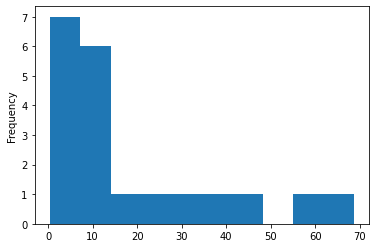

In [13]:
df.distance.plot.hist()

<AxesSubplot:ylabel='Frequency'>

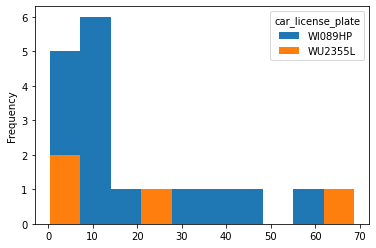

In [14]:
df.pivot(columns='car_license_plate', values='distance').plot.hist()

In [15]:
df.groupby('car_license_plate').distance.mean()

car_license_plate
WI089HP    16.72570
WU2355L    23.44361
Name: distance, dtype: float64

<AxesSubplot:ylabel='Frequency'>

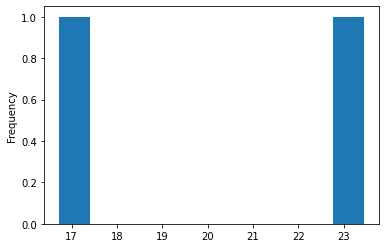

In [16]:
df.groupby('car_license_plate').distance.mean().plot.hist()